In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=30, random_state=42)

In [122]:
df = pd.DataFrame()
df["kolumna"] = list(range(110))

<AxesSubplot:ylabel='Density'>

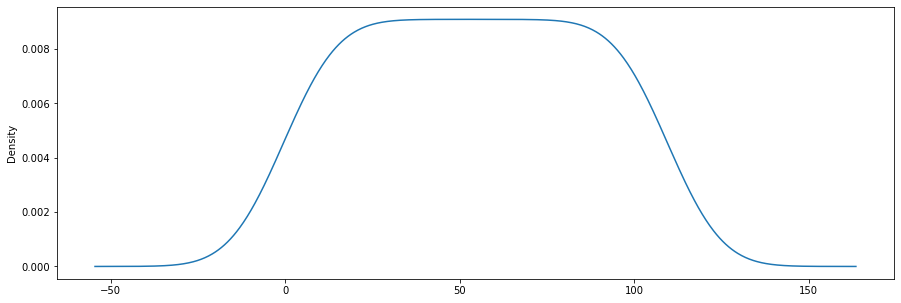

In [123]:
plt.rcParams['figure.figsize'] = [15, 5]
df["kolumna"].plot.density()

<AxesSubplot:ylabel='Frequency'>

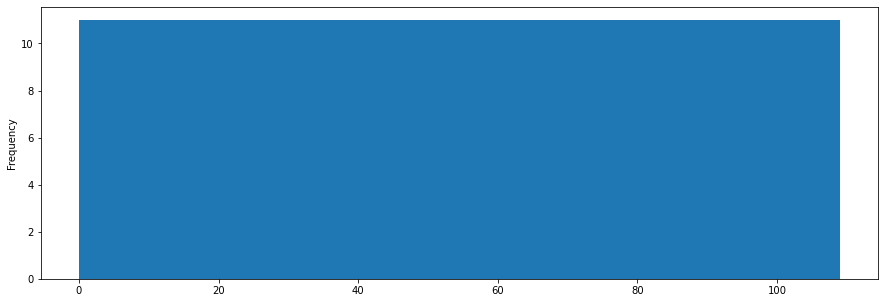

In [124]:
plt.rcParams['figure.figsize'] = [15, 5]
df["kolumna"].plot.hist()

In [125]:
df.shape

(110, 1)

In [126]:
df["kolumna2"] = [x+10 if x > 50 else x for x in range(60)]+[10050 for x in range(50)]

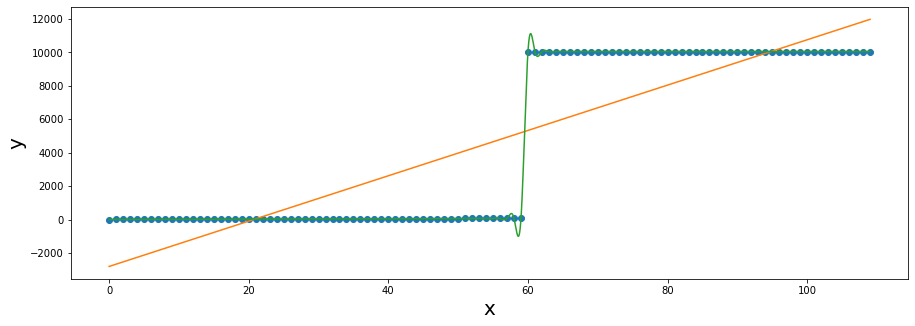

In [127]:
import matplotlib.pyplot as plt
x = df["kolumna"]
y = df["kolumna2"]
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.xlabel("x", size=20)
plt.ylabel("y", size=20)

from scipy.interpolate import make_interp_spline
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 5000)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)

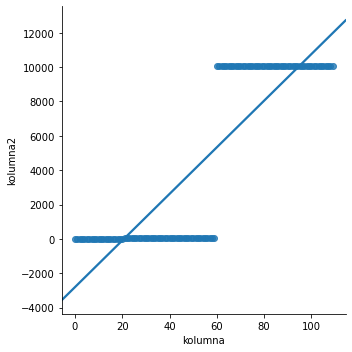

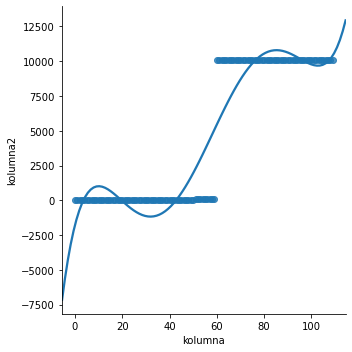

In [132]:
sns.lmplot(x='kolumna', y='kolumna2', data=df, ci=None, order=1, truncate=False)
sns.lmplot(x='kolumna', y='kolumna2', data=df, ci=None, order=5, truncate=False)

C:\Users\Toshiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kolumna', ylabel='kolumna2'>

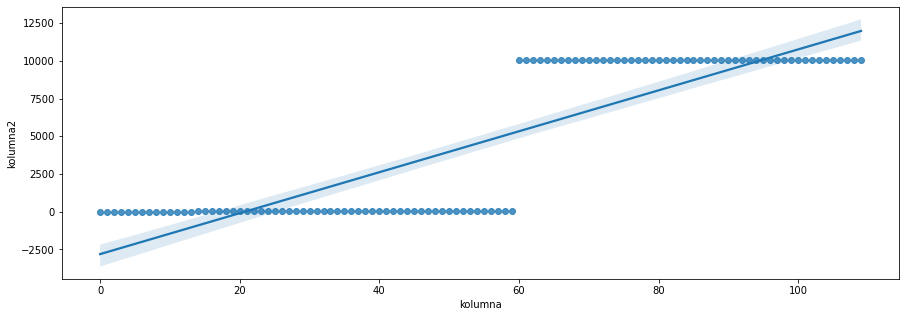

In [88]:
import seaborn as sns

#create scatterplot with regression line and confidence interval lines
sns.regplot(x, y)

In [ ]:
df = pd.read_table(url, header=None)

In [55]:
df["kolumna"].quantile([0.1, 0.5]).reset_index().rename(columns={"index":"kwantyl"})

,kwantyl,kolumna
0,0.1,5.0
1,0.5,44.5


In [ ]:
y_test_hat = model_log_reg.predict_proba(X_test)[:,1]
y_train_hat = model_log_reg.predict_proba(X_train)[:,1]

# Gain, Lift, Roc - 1 zmienna

In [ ]:
def gain_lift_roc_plot_1(y_test: pd.Series, y_test_hat: pd.Series, return_chart: str, n: int):
    
    cutoff_range = np.arange(0, 1.0, 0.001)
    rpp = [0]*len(cutoff_range)
    tpr = rpp.copy()
    lift = rpp.copy()
    fpr = rpp.copy()
    prc = rpp.copy()
    x0 = np.mean(y_test)
    
    plt.subplot(2, 2, n)
    
    for i, cutoff in enumerate(cutoff_range):
        y_test_hat_bin = np.where(y_test_hat >= cutoff, 1, 0)
        conf_mat = confusion_matrix(y_test, y_test_hat_bin)
        rpp[i] = np.sum(conf_mat[:,1]) / np.sum(conf_mat)
        fpr[i] = conf_mat[0,1] / np.sum(conf_mat[0,:])
        tpr[i] = conf_mat[1,1] / np.sum(conf_mat[1,:])
        prc[i] = conf_mat[1,1] / np.sum(conf_mat[:,1])
        lift[i] = tpr[i] / rpp[i]
        
    for i, cutoff in enumerate(cutoff_range):
        y_test_hat_bin = np.where(y_test_hat >= cutoff, 1, 0)
        conf_mat = confusion_matrix(y_test, y_test_hat_bin)
        rpp[i] = np.sum(conf_mat[:,1]) / np.sum(conf_mat)
        fpr[i] = conf_mat[0,1] / np.sum(conf_mat[0,:])
        tpr[i] = conf_mat[1,1] / np.sum(conf_mat[1,:])
        prc[i] = conf_mat[1,1] / np.sum(conf_mat[:,1])
        lift[i] = tpr[i] / rpp[i]
        
        
    if return_chart == "gain":
        plt.xlabel("Rate of Positive Predictions")
        plt.ylabel("True Positive Rate")
        
        plt.plot(rpp, tpr, color="black", label = "Model test")
        plt.plot([0,x0],[0,1], color='black', linestyle=':', label = "Wizard test") # wizard
        plt.plot([x0,1],[1,1], color='black', linestyle=':') # wizard
        
        plt.plot([0,1],[0,1], color='blue', linestyle="--", label = "Random") # random
    
        plt.legend(loc = "lower right")
        plt.title("Gain chart")
        
    elif return_chart == "lift":
        plt.xlabel("Rate of Positive Predictions")
        plt.ylabel("Lift")
        
        plt.plot(rpp, lift, color="black", label = "Model test")
        plt.plot([0,x0],[1/x0,1/x0], color='black', linestyle=':', label = "Wizard test") # wizard
        plt.plot(np.arange(x0, 1, 0.01), 1/np.arange(x0,1, 0.01), color='black', linestyle=':') # wizard
        
        plt.plot([0,1],[1,1], color='blue', linestyle="--", label = "Random") # random

        plt.legend(loc = "upper right")
        plt.title("Lift chart")
        
    elif return_chart == "roc":
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")

        plt.plot(fpr, tpr, color="green", label = "Model test")
        plt.plot([0,1],[0,1], color='blue', linestyle="--", label = "Random") # random
        plt.plot([0,0],[0,1], color='black', linestyle=':', label = "Wizard") # wizard
        plt.plot([0,1],[1,1], color='black', linestyle=':') # wizard
        
        plt.legend(loc = "lower right")
        plt.title("ROC chart")
    plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)

# Gain, Lift, Roc - 2 zmienne

In [ ]:
def gain_lift_roc_plot_2(y_test: pd.Series, y_test_hat: pd.Series, 
                       y_train: pd.Series, y_train_hat: pd.Series, 
                       return_chart: str, n: int):

    cutoff_range_train = np.arange(0, 1.0, 0.001)
    rpp_train = [0]*len(cutoff_range_train)
    tpr_train = rpp_train.copy()
    lift_train = rpp_train.copy()
    fpr_train = rpp_train.copy()
    prc_train = rpp_train.copy()
    x0_train = np.mean(y_train)
    
    cutoff_range = np.arange(0, 1.0, 0.001)
    rpp = [0]*len(cutoff_range)
    tpr = rpp.copy()
    lift = rpp.copy()
    fpr = rpp.copy()
    prc = rpp.copy()
    x0 = np.mean(y_test)
    
    plt.subplot(2, 2, n)
    
    for i, cutoff in enumerate(cutoff_range):
        y_test_hat_bin = np.where(y_test_hat >= cutoff, 1, 0)
        conf_mat = confusion_matrix(y_test, y_test_hat_bin)
        rpp[i] = np.sum(conf_mat[:,1]) / np.sum(conf_mat)
        fpr[i] = conf_mat[0,1] / np.sum(conf_mat[0,:])
        tpr[i] = conf_mat[1,1] / np.sum(conf_mat[1,:])
        prc[i] = conf_mat[1,1] / np.sum(conf_mat[:,1])
        lift[i] = tpr[i] / rpp[i]
        
        
        y_train_hat_bin = np.where(y_train_hat >= cutoff, 1, 0)
        conf_mat_train = confusion_matrix(y_train, y_train_hat_bin)
        rpp_train[i] = np.sum(conf_mat_train[:,1]) / np.sum(conf_mat_train)
        fpr_train[i] = conf_mat_train[0,1] / np.sum(conf_mat_train[0,:])
        tpr_train[i] = conf_mat_train[1,1] / np.sum(conf_mat_train[1,:])
        prc_train[i] = conf_mat_train[1,1] / np.sum(conf_mat_train[:,1])
        lift_train[i] = tpr_train[i] / rpp_train[i]
        
        
    for i, cutoff in enumerate(cutoff_range):
        y_test_hat_bin = np.where(y_test_hat >= cutoff, 1, 0)
        conf_mat = confusion_matrix(y_test, y_test_hat_bin)
        rpp[i] = np.sum(conf_mat[:,1]) / np.sum(conf_mat)
        fpr[i] = conf_mat[0,1] / np.sum(conf_mat[0,:])
        tpr[i] = conf_mat[1,1] / np.sum(conf_mat[1,:])
        prc[i] = conf_mat[1,1] / np.sum(conf_mat[:,1])
        lift[i] = tpr[i] / rpp[i]
        
        
        y_train_hat_bin = np.where(y_train_hat >= cutoff, 1, 0)
        conf_mat_train = confusion_matrix(y_train, y_train_hat_bin)
        rpp_train[i] = np.sum(conf_mat_train[:,1]) / np.sum(conf_mat_train)
        fpr_train[i] = conf_mat_train[0,1] / np.sum(conf_mat_train[0,:])
        tpr_train[i] = conf_mat_train[1,1] / np.sum(conf_mat_train[1,:])
        prc_train[i] = conf_mat_train[1,1] / np.sum(conf_mat_train[:,1])
        lift_train[i] = tpr_train[i] / rpp_train[i]
        
    if return_chart == "gain":
        plt.xlabel("Rate of Positive Predictions")
        plt.ylabel("True Positive Rate")
        
        plt.plot(rpp_train, tpr_train, color="orange", label = "Model train")
        plt.plot([0,x0_train],[0,1], color='orange', linestyle=':', label = "Wizard train") # wizard
        plt.plot([x0_train,1],[1,1], color='orange', linestyle=':') # wizard
        
        plt.plot(rpp, tpr, color="black", label = "Model test")
        plt.plot([0,x0],[0,1], color='black', linestyle=':', label = "Wizard test") # wizard
        plt.plot([x0,1],[1,1], color='black', linestyle=':') # wizard
        
        plt.plot([0,1],[0,1], color='blue', linestyle="--", label = "Random") # random
        
        plt.legend(loc = "lower right")
        plt.title("Gain chart")
        
        
    elif return_chart == "lift":
        plt.xlabel("Rate of Positive Predictions")
        plt.ylabel("Lift")
        
        plt.plot(rpp_train, lift_train, color="orange", label = "Model train")
        plt.plot([0,x0_train],[1/x0_train,1/x0_train], color='orange', linestyle=':', 
                 label = "Wizard train") # wizard
        plt.plot(np.arange(x0_train, 1, 0.01), 1/np.arange(x0_train,1, 0.01), color='orange', linestyle=':') # wizard
        
        plt.plot(rpp, lift, color="black", label = "Model test")
        plt.plot([0,x0],[1/x0,1/x0], color='black', linestyle=':', label = "Wizard test") # wizard
        plt.plot(np.arange(x0, 1, 0.01), 1/np.arange(x0,1, 0.01), color='black', linestyle=':') # wizard
        
        plt.plot([0,1],[1,1], color='blue', linestyle="--", label = "Random") # random

        plt.legend(loc = "upper right")
        plt.title("Lift chart")
                
    elif return_chart == "roc":
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.plot(fpr_train, tpr_train, color="orange", label = "Model train")
        plt.plot(fpr, tpr, color="green", label = "Model test")
        plt.plot([0,1],[0,1], color='blue', linestyle="--", label = "Random") # random
        plt.plot([0,0],[0,1], color='black', linestyle=':', label = "Wizard") # wizard
        plt.plot([0,1],[1,1], color='black', linestyle=':') # wizard
        
        plt.legend(loc = "lower right")
        plt.title("ROC chart")
    plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)

In [ ]:
fprv, tprv, _ = roc_curve(y_test, y_test_hat)
fprt, tprt, _ = roc_curve(y_train, y_train_hat)
auc_rocv = auc(fprv, tprv)
auc_roct = auc(fprt, tprt)

plt.figure()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC&AUC using sklearn")

plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = "Random, AUC = 0.5")
plt.plot([0, 0], [0, 1], color='navy', linestyle=':', label = "Wizard, AUC = 1.0")
plt.plot([0, 1], [1, 1], color='navy', linestyle=':')

plt.plot(fprt, tprt, color = 'orange', label='Model - train, AUC = %0.2f' % auc_roct)
plt.plot(fprv, tprv, color = 'red', label='Model - val, AUC = %0.2f' % auc_rocv)
plt.legend(loc="lower right");

# Macierz pomyłek, kosztów

In [42]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_true, y_pred)

tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [43]:
1*fp + 4*fn

6

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

In [37]:
import numpy as np
import pandas as pd
X_train = pd.DataFrame()
X_train["x"] = np.arange(0,10, 1)

y_train = np.array([0,0,0,0,0,1,1,1,1,1])

# Wizualizacja drzewa

In [38]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X_train, y_train)

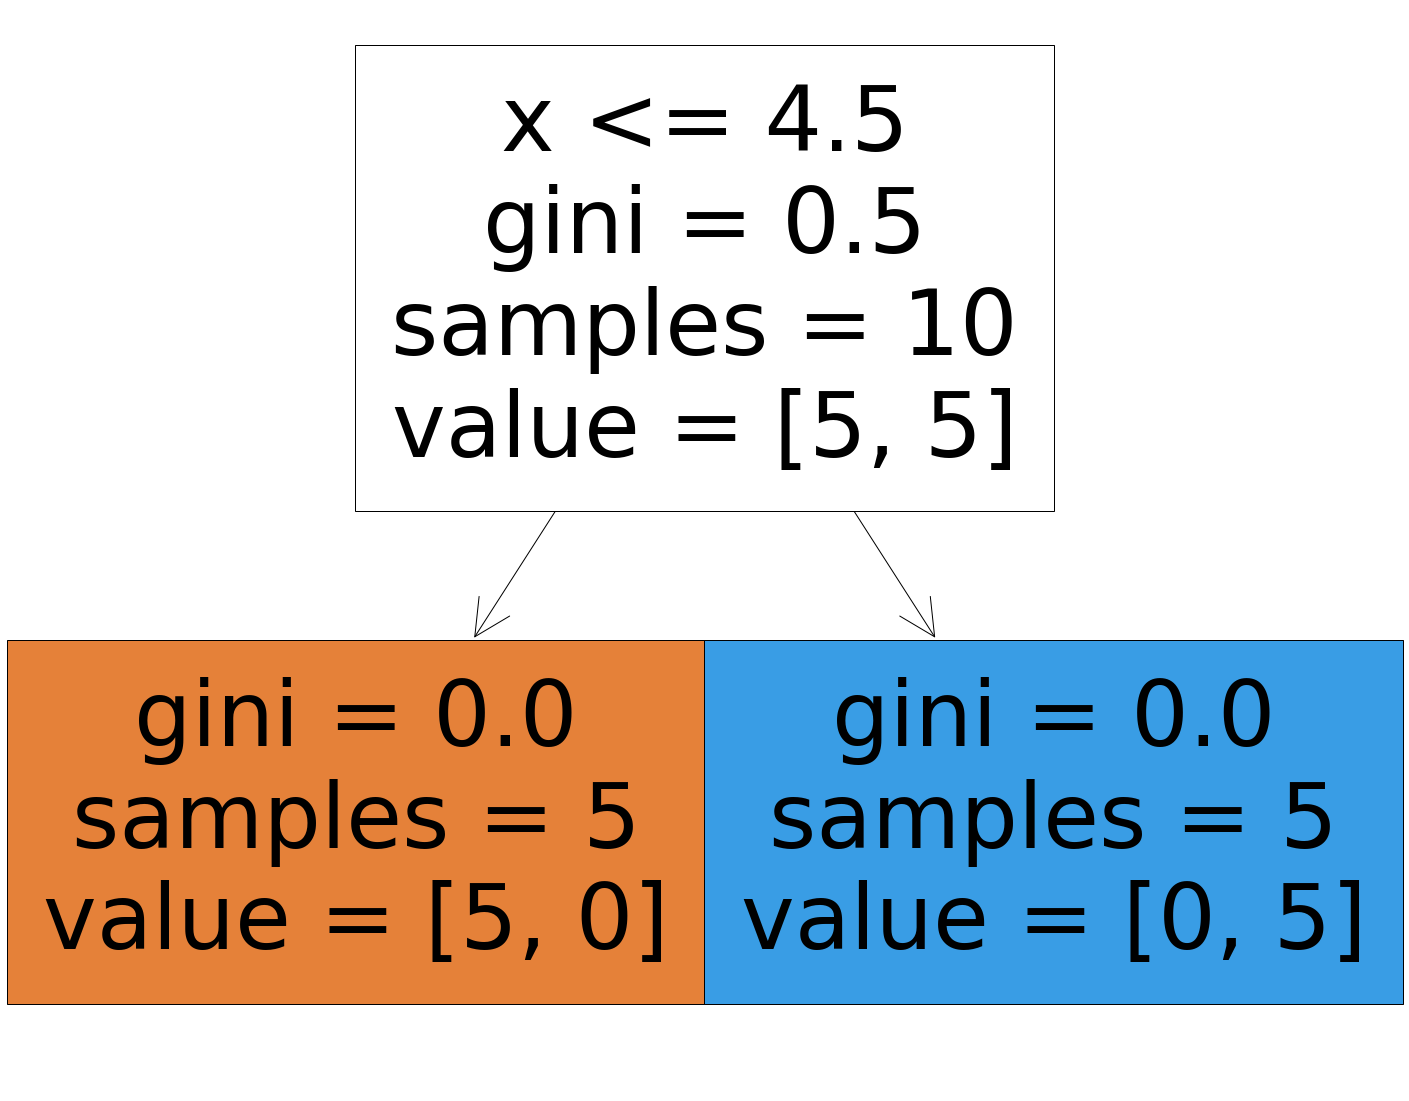

In [39]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True, feature_names=X_train.columns)

# Modele

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# (criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
#  random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
#  class_weight=None, ccp_alpha=0.0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log_reg = LogisticRegression(random_state = 42, solver = 'liblinear', penalty = 'l1')
model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.35, tol=0.01).fit(X_train,y_train)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, clf.predict_proba(X))

# outliery

In [ ]:
from scipy import stats
stats.zscore(numeric_dataset)

dataset = dataset[(np.abs(stats.zscore(numeric_dataset)) < 9).all(axis = 1)]

In [ ]:
1. z-score -  z = (x – μ) / σ
2. Boxploty - outlierem jest każda liczba mniejsza niż Q1−(1.5×IQR) lub większa niż Q3+(1.5×IQR)

high cardinality - zmienna/kolumna z dużą liczbą wartości unikatowych